In [67]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
sonar_df = pd.read_csv(r'..\Cases\Sonar\Sonar.csv')
sonar_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [15]:
X= sonar_df.drop(columns=['Class'])
y= sonar_df['Class']
le= LabelEncoder()
y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
y_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [16]:
nb = LinearDiscriminantAnalysis()
nb.fit(X_train,y_train) # calculates all aporiat probalblities

LinearDiscriminantAnalysis()

In [17]:
probas = nb.predict_proba(X_test) # calculates posterior proabalities
roc_auc_score(y_test,probas[:,1])

0.8306288032454361

# Iris Dataset

In [18]:
iris_df = pd.read_csv(r'..\Datasets\iris.csv')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
X= iris_df.drop(columns=['Species'])
y= iris_df['Species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train) 

LinearDiscriminantAnalysis()

In [27]:
y_pred = nb.predict(X_test) # calculates posterior proabalities
accuracy_score(y_test,y_pred)

0.9555555555555556

### Fit_transform in LDA on iris dataset (Unsupervised Learbibg) 

In [29]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
components = lda.fit_transform(X,y)

In [35]:
components['Species']=iris_df['Species']
components.head()

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa


In [33]:
import seaborn as sns
import matplotlib.pylab as plt

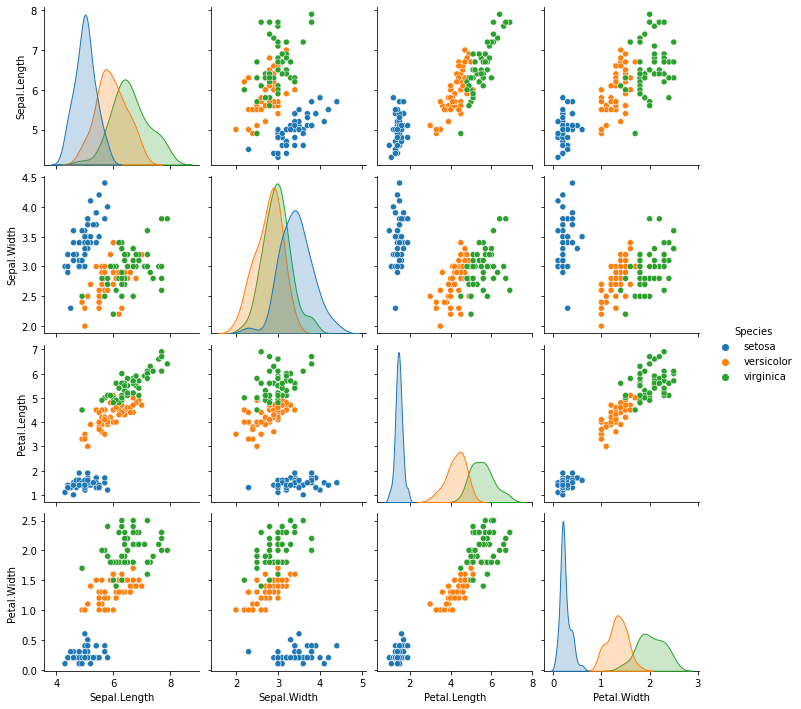

In [41]:
sns.pairplot(data=iris_df,hue='Species')
plt.show()

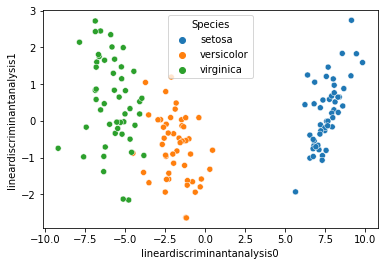

In [ ]:
# with LDA you get summary of above corr
sns.scatterplot(data=components,x='lineardiscriminantanalysis0',y='lineardiscriminantanalysis1',hue='Species')

plt.show()

### with glass data set

In [42]:
glass_df = pd.read_csv(r'..\Cases\Glass Identification\Glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [ ]:
X= glass_df.drop(columns=['Type'])
y= glass_df['Type']



In [44]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
components = lda.fit_transform(X,y)

In [45]:
components['Type']=glass_df['Type']
components.head()

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,lineardiscriminantanalysis2,lineardiscriminantanalysis3,lineardiscriminantanalysis4,Type
0,-1.843629,1.070204,0.426325,-0.195477,-0.369626,building_windows_float_processed
1,-0.035910,1.007550,0.065493,0.665097,-0.603616,building_windows_float_processed
2,-0.329413,0.482676,0.003256,-0.468414,-0.478646,building_windows_float_processed
3,-1.566863,-0.262982,-0.077932,-1.430507,-0.502115,building_windows_float_processed
4,-0.747609,0.644428,0.321360,0.504076,-0.571573,building_windows_float_processed


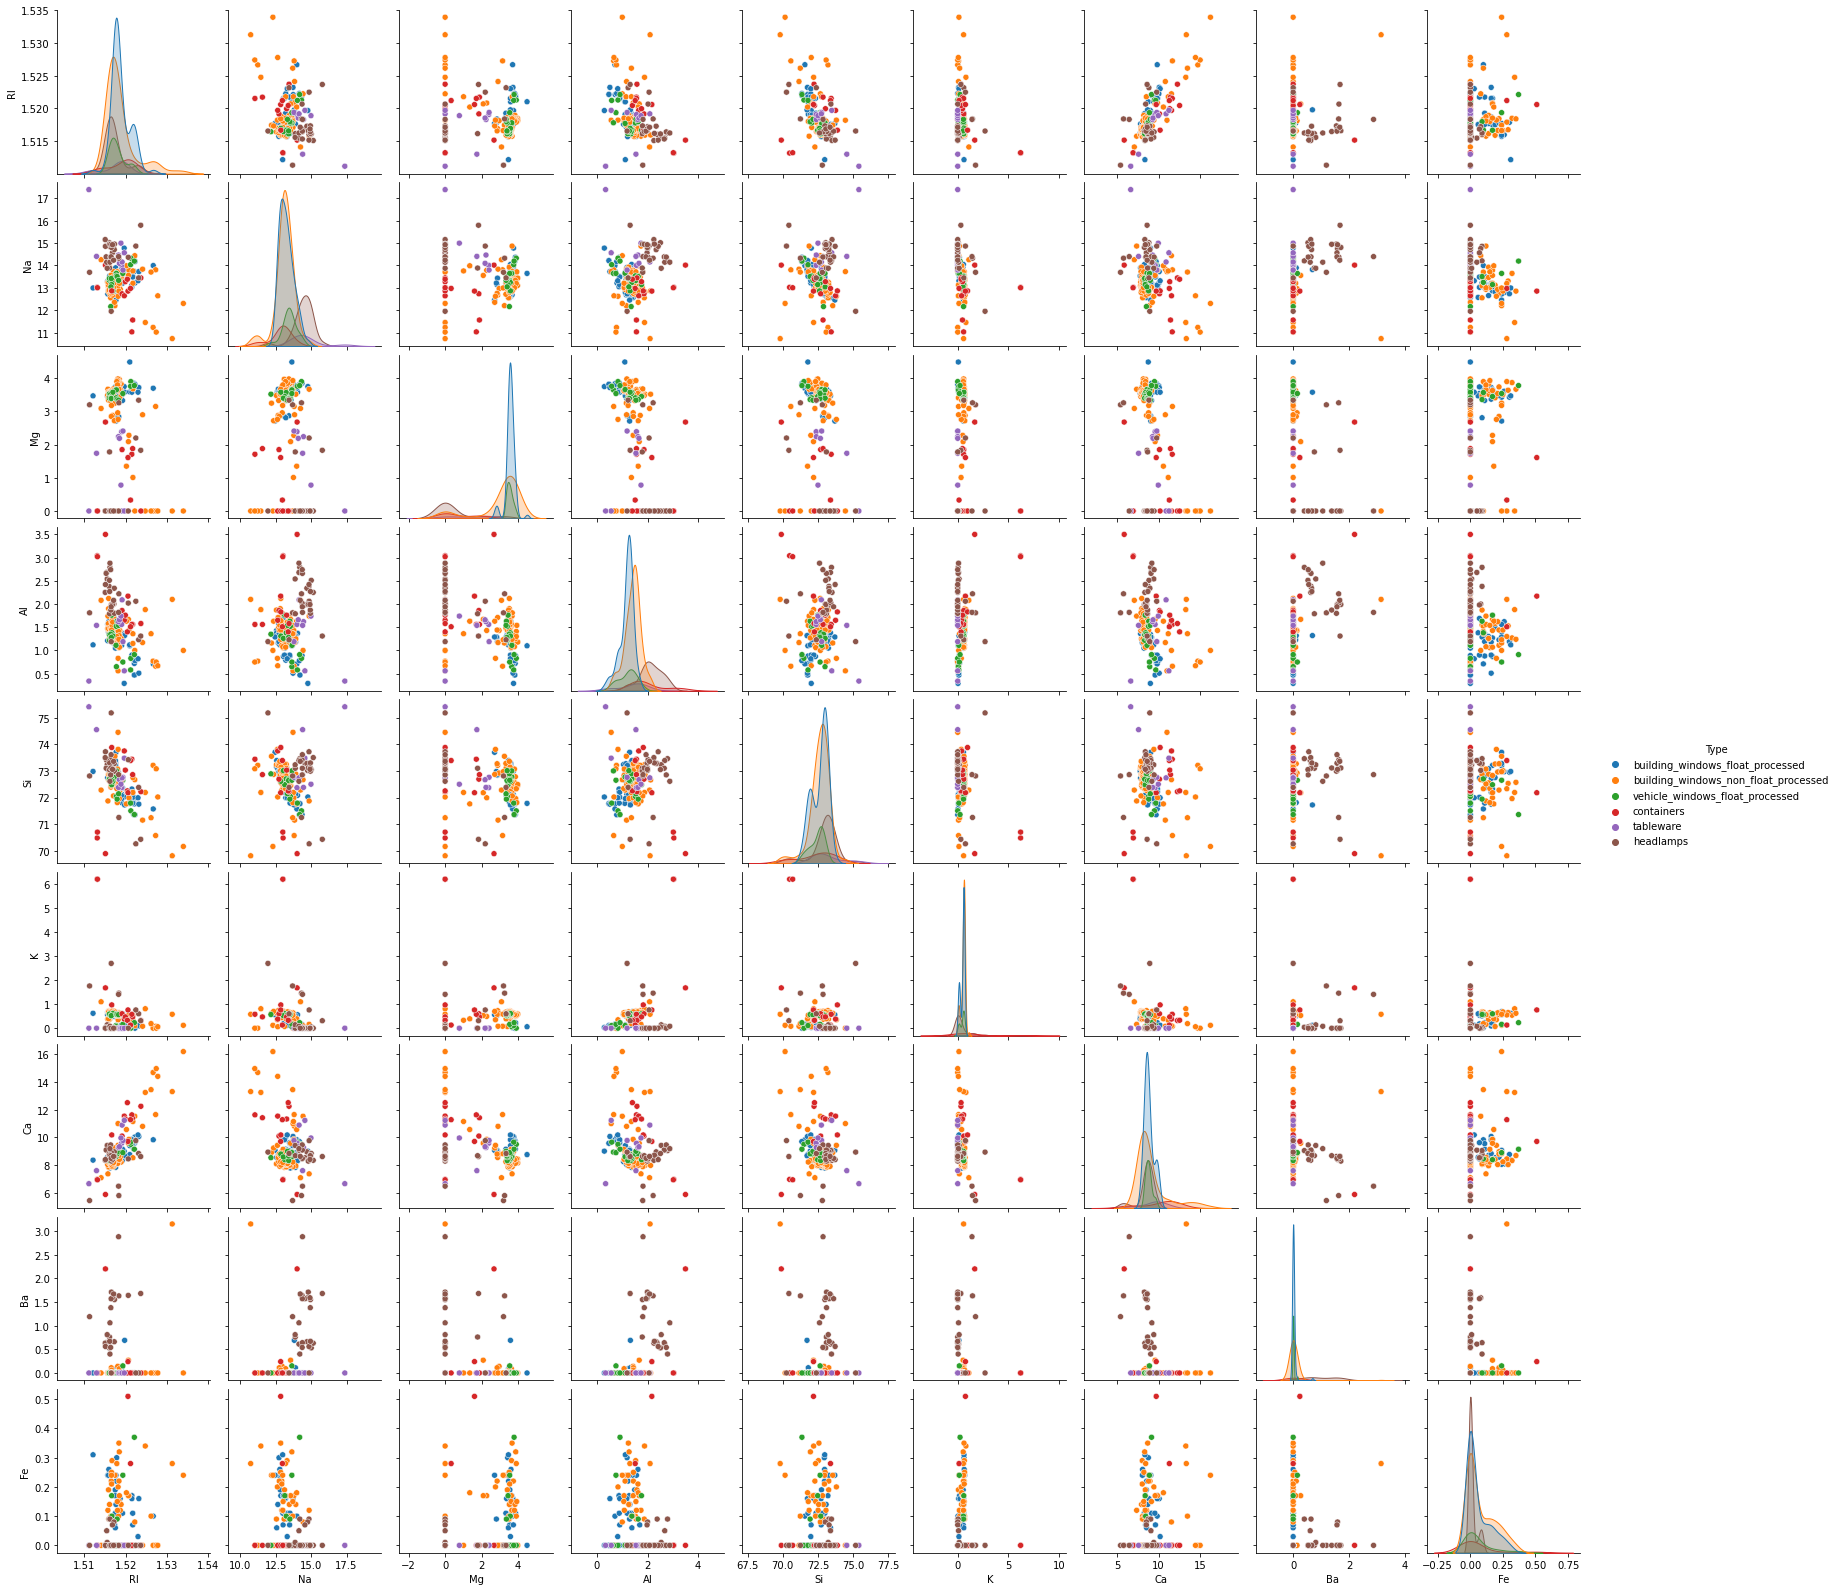

In [47]:
sns.pairplot(data=glass_df,hue='Type')
plt.show()

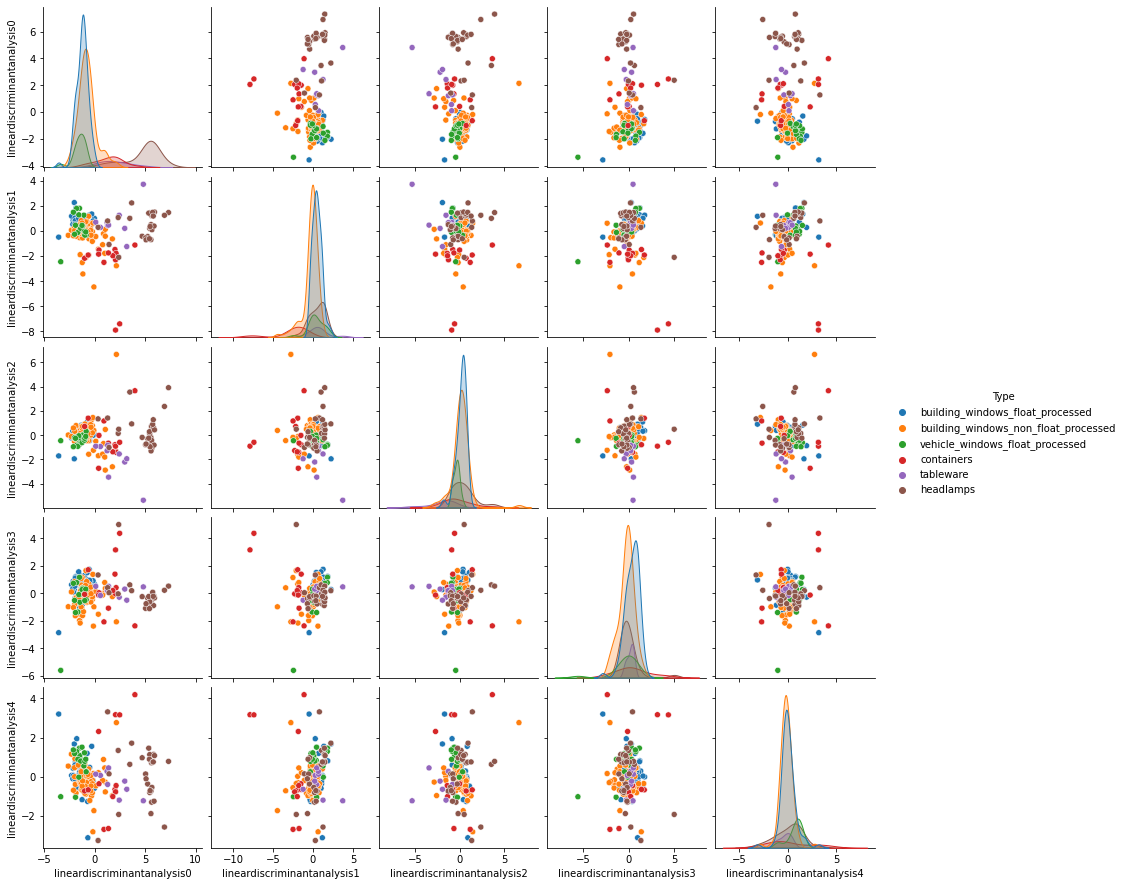

In [48]:
sns.pairplot(data=components,hue='Type')
plt.show()

### Training using original and LDA data

Using Original Data

In [ ]:
lr=LogisticRegression()

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
y_train

78     building_windows_non_float_processed
21         building_windows_float_processed
154         vehicle_windows_float_processed
74     building_windows_non_float_processed
181                               tableware
                       ...                 
135    building_windows_non_float_processed
206                               headlamps
134    building_windows_non_float_processed
92     building_windows_non_float_processed
13         building_windows_float_processed
Name: Type, Length: 149, dtype: object

In [56]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.6615384615384615

Using the LDA processed Data

In [75]:
le=LabelEncoder()
X=components.drop('Type',axis=1)
y=components['Type']
le_y=le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,le_y,test_size=0.3,random_state=25,stratify=y)

In [76]:
lr=LogisticRegression()

In [77]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.6923076923076923

### Multivariate LDA (Quadratic)

1. For sonar dataset

In [82]:
sonar_df = pd.read_csv(r'..\Cases\Sonar\Sonar.csv')
sonar_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
le=LabelEncoder()
X=sonar_df.drop('Class',axis=1)
y=sonar_df['Class']
le_y=le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,le_y,test_size=0.3,random_state=25,stratify=y)

In [87]:
qda=QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)
y_pred_proba=qda.predict_proba(X_test)

In [89]:
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred_proba[:,1]))

0.7936507936507936
0.8823529411764706


2. For Glass Dataset

In [109]:
glass_df = pd.read_csv(r'..\Cases\Glass Identification\Glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [107]:
X= glass_df.drop(columns=['Type'],axis=1)
y= glass_df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [111]:
regs=np.linspace(0,1,20)
scores=[]
for i in regs:
    qda=QuadraticDiscriminantAnalysis(reg_param=i)
    qda.fit(X_train,y_train)
    y_pred=qda.predict(X_test)
    scores.append([i,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['regs','accuracy_score'])
df_scores.sort_values(by='accuracy_score',ascending=False,inplace=True)
df_scores.head()

,regs,accuracy_score
2,0.105263,0.569231
3,0.157895,0.553846
4,0.210526,0.538462
5,0.263158,0.538462
6,0.315789,0.538462
